# Primer intento de SOM

## Primero revisaremos si funciona para detectar clusters

In [51]:
from minisom import MiniSom
from sklearn.datasets import load_breast_cancer
import time
import numpy as np

In [41]:
import matplotlib.pyplot as plt
from pylab import plot,axis,show,pcolor,colorbar,bone

In [4]:
som_grid_rows = 30
som_grid_columns = 20
iterations = 500
sigma = 1
learning_rate = .5

In [5]:
data, target = load_breast_cancer(True)

/home/sergio/miniconda3/envs/py3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass return_X_y=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [54]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc

MinMaxScaler()

In [55]:
data_sc = sc.fit_transform(data)
data_sc.shape

(569, 30)

In [56]:
som = MiniSom(x=som_grid_rows,
             y=som_grid_columns,
             input_len = data_sc.shape[1],
             sigma=sigma,
             learning_rate=learning_rate)
som.random_weights_init(data)

In [57]:
# entrenamiento

start_time = time.time()

som.train_random(data,iterations)

elapsed_time = time.time() - start_time

print(elapsed_time)

0.10537314414978027


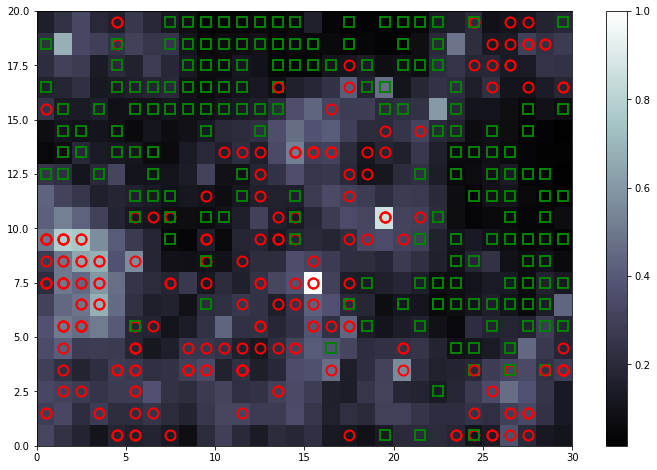

In [58]:
plt.figure(figsize=((12,8)))
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors=['r','g']
for i, x in enumerate(data):
    w = som.winner(x)
    plot(w[0]+.5,
         w[1]+.5,
         markers[target[i]],
        markeredgecolor=colors[target[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2)
show()


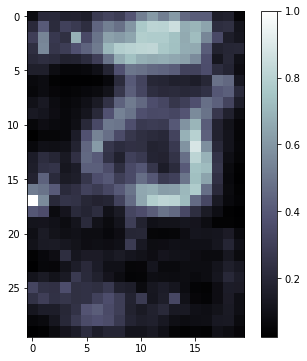

In [46]:
plt.figure(figsize=((6,6)))
plt.imshow(som.distance_map())
plt.colorbar()

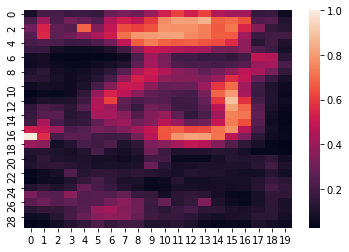

In [47]:
import seaborn as sns
sns.heatmap(som.distance_map())

In [59]:
mappings=som.win_map(data)
len(mappings), type(mappings)

(285, collections.defaultdict)

In [62]:
#mappings

In [60]:
detecciones = np.concatenate([mappings[(1,1)], mappings[(1,8)]])
detecciones

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [53]:
sc.inverse_transform(detecciones)

NameError: name 'sc' is not defined

In [ ]:
import csv
import json
import sys
#import pandas as pd
from business import intel
csv.field_size_limit(sys.maxsize)
request_data_json = []
with open ('score_requests_15062020.csv', newline='') as csvfile:
    cursor = csv.DictReader(csvfile)
    for row in cursor:
        try:
            request_data_json.append(json.loads(row['request_data']))
        except e:
            print(e)
            
xx, yy, zz = intel.get_dataframes_from_all_json(request_data_json)
# COnvertir estos DataFrames en CSV o Exportarlos a algo util :D
print(xx.shape)
print(yy.shape)
print(zz.shape)